In [ ]:
#import required libraries
from tensorflow import keras
from keras.utils.vis_utils import plot_model
from keras.applications.inception_v3 import InceptionV3
from glob import glob
from keras.layers import Flatten,Dense
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator,img_to_array,array_to_img,load_img

In [ ]:
# images given are not of standard size
IMAGE_SIZE = [224,224]

In [ ]:
train_path = "/content/drive/MyDrive/Datasets/leaf_disease_data/image"

In [ ]:
# Using the inception model
inception = InceptionV3(include_top=False,weights='imagenet',input_shape=IMAGE_SIZE + [3])

87924736/87910968 [==============================] - 1s 0us/step


In [ ]:
#avoid training existing weights
for layer in inception.layers:
  layer.trainable = False

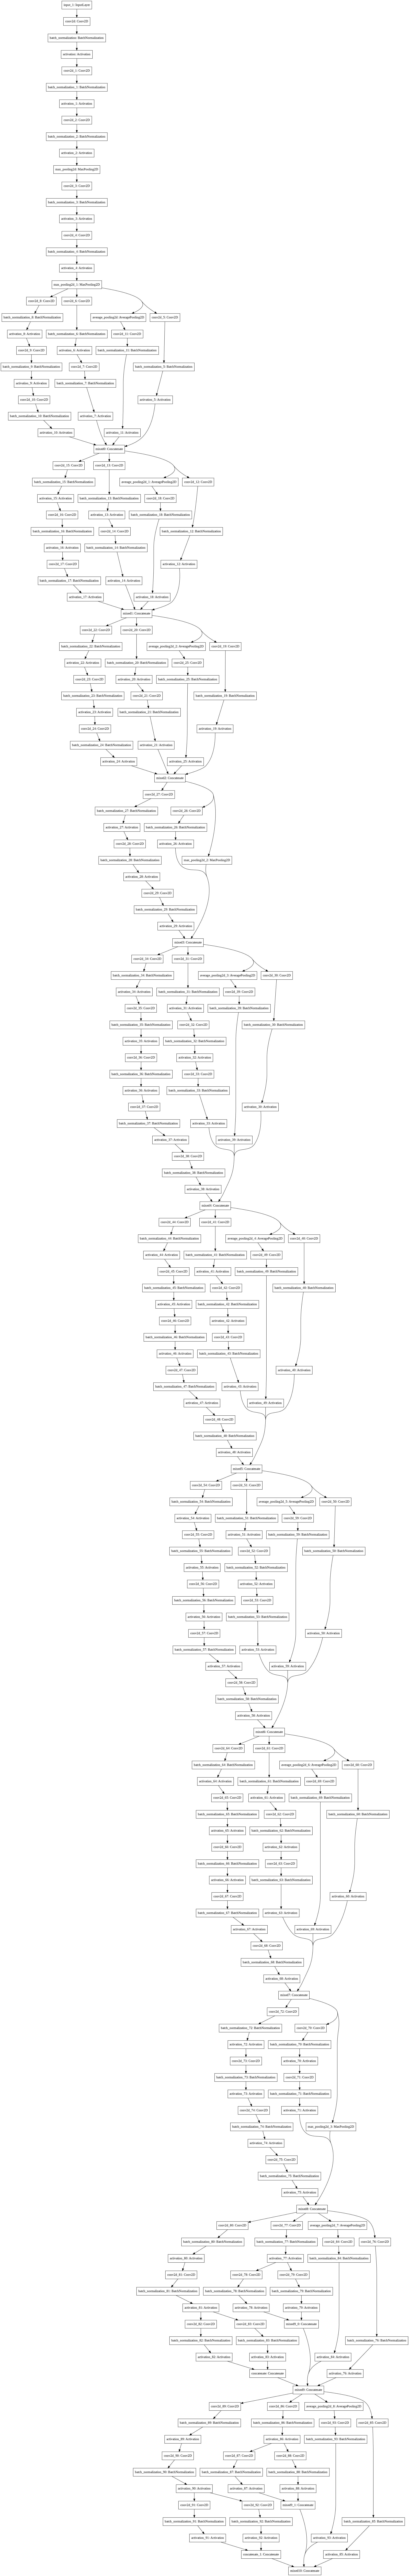

In [ ]:
plot_model(inception,to_file='model.png')

In [ ]:
# Number of output neurons
folders = glob('/content/drive/MyDrive/Datasets/leaf_disease_data/image/*')

folders

['/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Early_blight',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___healthy',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Late_blight',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Target_Spot',
 '/content/drive/MyDrive/Datasets/leaf_disease_data/image/Tomato___Septoria_leaf_spot']

In [ ]:
#flatten the output of inception model
x = Flatten()(inception.output)

In [ ]:
# last layer of the model
prediction = Dense(len(folders),activation='softmax')(x)

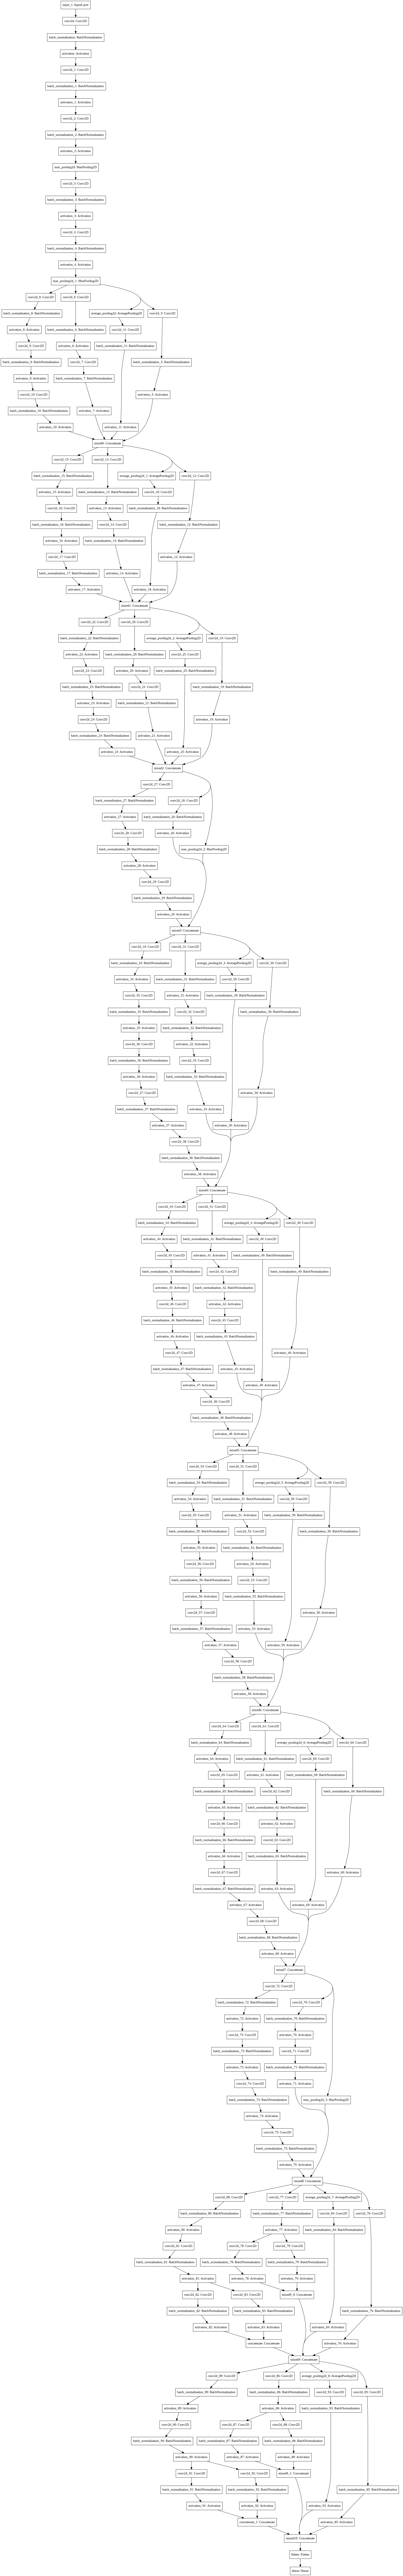

In [ ]:
#create model
model = Model(inputs=inception.input,outputs = prediction)
plot_model(model)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 111, 111, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 111, 111, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 111, 111, 32) 0           batch_normalization[0][0]        
______________________________________________________________________________________________

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

train_datagen = ImageDataGenerator(rescale=1./255,shear_range=0.2,horizontal_flip=True,zoom_range=0.2)

In [ ]:
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 3265 images belonging to 10 classes.


In [ ]:
r = model.fit_generator(
  training_set,
  epochs=10,
  steps_per_epoch=len(training_set)
)

/usr/local/lib/python3.7/dist-packages/keras/engine/training.py:1972: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
103/103 [==============================] - 957s 9s/step - loss: 4.8804 - accuracy: 0.5522
Epoch 2/10
103/103 [==============================] - 319s 3s/step - loss: 2.0456 - accuracy: 0.7274
Epoch 3/10
103/103 [==============================] - 318s 3s/step - loss: 1.9860 - accuracy: 0.7611
Epoch 4/10
103/103 [==============================] - 319s 3s/step - loss: 1.4165 - accuracy: 0.8135
Epoch 5/10
103/103 [==============================] - 319s 3s/step - loss: 1.1042 - accuracy: 0.8386
Epoch 6/10
103/103 [==============================] - 319s 3s/step - loss: 2.7674 - accuracy: 0.7862
Epoch 7/10
103/103 [==============================] - 319s 3s/step - loss: 1.3450 - accuracy: 0.8533
Epoch 8/10
103/103 [==============================] - 318s 3s/step - loss: 1.0120 - accuracy: 0.8781
Epoch 9/10
103/103 [==============================] - 319s 3s/step - loss: 0.8406 - accuracy: 0.8851
Epoch 10/10
103/103 [==============================] - 319s 3s/step - loss: 0.8729 - accura